In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d, Axes3D 
import scipy
from scipy import optimize

In [2]:
def relu(x, ablimit,slope,c):
    return (x-ablimit)*slope*((x-ablimit)*slope>0)+c

In [3]:
%matplotlib inline

In [4]:
def getalldata(label):
    Xsez=[]
    Ysez=[]
    Zsez=[]
    c=[]
    Fl=[]
    for filename in ['torun/outputs/'+file for file in os.listdir('torun/outputs') if file.startswith('NPs_{}'.format(label))]:
        #print (filename)
        #try:
        flux=pd.read_csv(filename,sep=' ', header=2).iloc[-1]['0.1']
        wavelength=float(filename.split('output')[-1].split('nm')[-3])
        fluence=float(filename.split('J')[-2].split('nm')[-1])
        pulselength=float(filename.split('fs')[-2].split('cm2')[-1])
        porous=float(filename.split('por')[-2].split('fs')[-1])
        Xsez.append(np.log10(pulselength))#np.log(pulselength))
        Ysez.append(wavelength)
        Zsez.append(flux)
        c.append(porous)
        Fl.append(fluence)
    Alldata=pd.DataFrame(columns=['label','pulselegth', 'wavelength', 'flux', 'porosity', 'fluence'])
    for pulselength, wavelength, flux, porosity, fluence in zip(Xsez,Ysez, Zsez, c,Fl):
        Alldata.loc[len(Alldata)]=(label,pulselength, wavelength, flux, porosity, fluence)
    return Alldata

In [17]:
allsamples=pd.DataFrame()
allsamples={}#[filename]
for filename in [a for a in os.listdir('torun/outputs/') if a.startswith('NPs_')]:
    allsamples[filename]=pd.read_csv('torun/outputs/'+filename,names=['time ,ps' ,'flux, N'], delimiter=' ', skiprows=[0,1,2])['flux, N']

In [96]:
def getvert(values):
    toret=[x for x in values if x.startswith('NPs_vert_flux')]
    toret.sort()
    return toret
def gethor(values):
    toret=[x for x in values if x.startswith('NPs_hor')]
    toret.sort()
    return toret
def get300nm(values):
    toret=[x for x in values if '300nm' in x]
    toret.sort()
    return toret
def get600nm(values):
    toret=[x for x in values if '600nm' in x]
    toret.sort()
    return toret
def getJ(values, jouels):
    toret=[x for x in values if str(jouels)+'Jcm2' in x]
    toret.sort()
    return toret
def getspherical(values):
    toret=[x for x in values if x.startswith('NPs_sphere')]
    toret.sort()
    return toret
def getspherical(values):
    toret=[x for x in values if x.startswith('NPs_2_5')]
    toret.sort()
    return toret
def getpor(values, porosity):
    toret=[x for x in values if str(porosity)+'por10nmsize' in x]
    toret.sort()
    return toret

In [93]:
#getpor(allsamples.keys(),0.5)

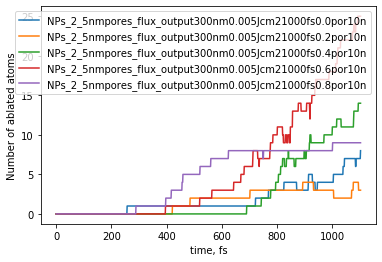

In [113]:
for i, filename in enumerate(getJ(get300nm(getspherical(allsamples.keys())), 0.005)):
    if i%2==0:
        flux=pd.read_csv('torun/outputs/'+filename,sep=' ', header=2)
        plt.plot(flux['0.1'], label=filename[:55])
plt.xlabel('time, fs')
plt.ylabel('Number of ablated atoms')
plt.legend()

In [23]:
[x in list()]# if x.startswith('NPs_1_8nm')]

NameError: name 'x' is not defined

Text(0, 0.5, 'Number of ablated atoms')

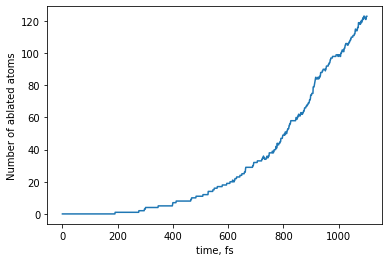

Text(0, 0.5, 'ablation rate')

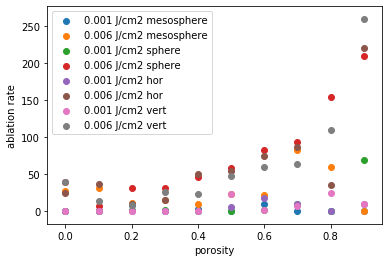

In [21]:
#%matplotlib qt
ablationrate=[]
fluences=[]
for label in ['mesosphere','sphere', 'hor','vert']: 
    Alldata=getalldata(label)
    for flu in [0.001 + i/1000 for i in range(0,9,5)]:
        #print(flu)
        Xsez=Alldata[Alldata['fluence']==flu]['porosity']
        Ysez=Alldata[Alldata['fluence']==flu]['flux'].copy()#.apply(lambda x:np.log(x))
        #Ysez=Ysez*1/(1-Xsez)
        label2='{} J/cm2 {}'.format(str(flu)[:5], label)
        #if label=='flux':
        #    label='randompores + {} J/cm2'.format(flu)
        plt.scatter(list(Xsez), list(Ysez/(1-Xsez)), label=label2)
plt.legend()
plt.xlabel('porosity')
plt.ylabel('ablation rate')

In [297]:
set(Alldata[Alldata['porosity']==0.2]['label'])

{'1_2nmpores', 'hor', 'mesosphere', 'sphere', 'vert'}

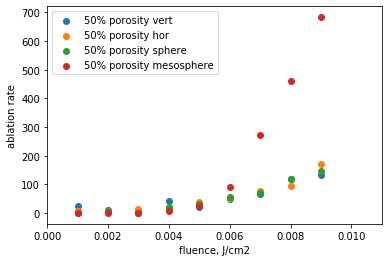

In [9]:
for label in ['vert', 'hor','sphere', 'mesosphere']:
    Alldata=getalldata(label)
    Alldata=Alldata[Alldata['fluence']<0.01]
    Xsez=list(Alldata[Alldata['porosity']==0.0]['fluence'])
    Ysez=list(Alldata[Alldata['porosity']==0.0]['flux']/1)
    #plt.scatter(Xsez,Ysez ,label='non porous')

    Xsez=list(Alldata[Alldata['porosity']==0.5]['fluence'])
    Ysez=list(Alldata[Alldata['porosity']==0.5]['flux']/0.5)
    plt.scatter(Xsez,Ysez, label='50% porosity {}'.format(label))
    #Xsez=list(Alldata[Alldata['porosity']==0.3]['fluence'])
    #Ysez=list(Alldata[Alldata['porosity']==0.3]['flux']/0.7)
    #plt.scatter(Xsez,Ysez, label='30% porosity {}'.format(label))
plt.xlabel('fluence, J/cm2')
plt.ylabel('ablation rate')
plt.xlim(0, 0.011)
plt.legend()

No handles with labels found to put in legend.


(0, 0.011)

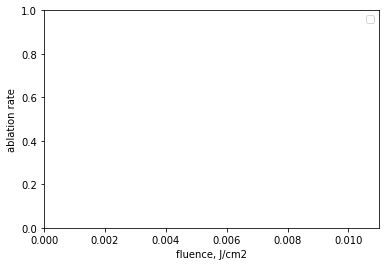

In [29]:
fluence=0.1
wavelength=300
#ablimits={}
Alldata={}
ablimits=pd.DataFrame(columns=['name','porosity','abl_limit','slope'])
for label in ['2nmpores','sphere','3nmpores','2_5nmpores','1_8nmpores','1_6nmpores','1_2nmpores','mesosphere','vert','hor']:
    Xsez=[]
    Ysez=[]
    Zsez=[]
    c=[]
    Fl=[]
    Alldata[label]=getalldata(label)
    '''for filename in ['torun/outputs/'+file for file in os.listdir('torun/outputs') if file.startswith('NPs_{}'.format(label))]:
        #print (filename)
        #try:
        flux=pd.read_csv(filename,sep=' ', header=2).iloc[-1]['0.1']
        wavelength=float(filename.split('output')[-1].split('nm')[-3])
        fluence=float(filename.split('J')[-2].split('nm')[-1])
        pulselength=float(filename.split('fs')[-2].split('cm2')[-1])
        porous=float(filename.split('por')[-2].split('fs')[-1])
        Xsez.append(np.log10(pulselength))#np.log(pulselength))
        Ysez.append(wavelength)
        Zsez.append(flux)
        c.append(porous)
        Fl.append(fluence)
    for i in [0,5,8]:
        xsez1=Alldata[Alldata['porosity']==i/10][Alldata['wavelength']==wavelength][Alldata['pulselegth']==3][Alldata['fluence']<0.015]['fluence']
        ysez1=Alldata[Alldata['porosity']==i/10][Alldata['wavelength']==wavelength][Alldata['pulselegth']==3][Alldata['fluence']<0.015]['flux'].apply(lambda x: x/(1-i/10))
        label1='porous0.{}'.format(i)
        plt.scatter(list(xsez1), list(ysez1), label=label+str(i/10),s=5)
        #(ablimit,slope), pcov = scipy.optimize.curve_fit(relu, xsez1,ysez1,bounds=(0, [5, 500.]))
        (ablimit,slope), pcov = scipy.optimize.curve_fit(relu, xsez1,ysez1,bounds=(0, [0.01, 2000000.]))
        ablimits=ablimits.append({'name':label,'porosity':i/10, 'abl_limit':ablimit,'slope': slope},ignore_index=True)
        #ablimits[label, i/10]=ablimit'''
plt.legend()
plt.xlabel('fluence, J/cm2')
plt.ylabel('ablation rate')
plt.xlim(0, 0.011)
#plt.ylim(-1,50)'''

In [30]:
Alldata=pd.concat(Alldata.values(),ignore_index=True)

In [31]:
Alldata.to_pickle('alldata.pkl')

In [32]:
alldata=pd.read_pickle('alldata.pkl')

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


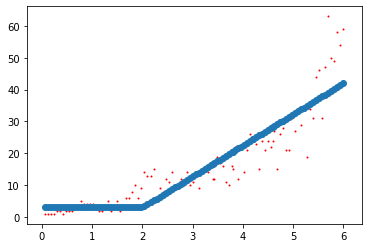

In [10]:
ablTH={}
for label in ['1_2nmpores','2_5nmpores']:#, '3nmpores']:
    for porosity in [0,0.5,0.8]:
        labeldata=alldata[alldata['label']==label][alldata['wavelength']==600][alldata['porosity']==porosity]
        xsez1,ysez1= labeldata['fluence'],labeldata['flux']+1
        (ablimit,slope,c), pcov = scipy.optimize.curve_fit(relu, xsez1,ysez1,bounds=(0, [2.0, 10000.0, 10.0]))
        ablTH[label,porosity]=ablimit
plt.scatter(xsez1,ysez1,c='r',s=1)
plt.scatter(xsez1, relu(xsez1, ablimit, slope,c))

In [41]:
labeldata=alldata[alldata['label']=='1_2nmpores'][alldata['wavelength']==300][alldata['porosity'].apply(lambda x: x in [0.0,0.3,0.6,0.9])]

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, '1.2 nm pores, 300 nm excitation')

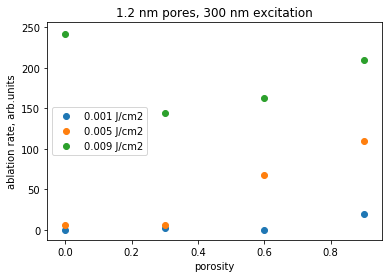

In [42]:
for fluence in [0.001, 0.005, 0.009]:
    topl=labeldata[labeldata['fluence']==fluence]
    plt.scatter(topl['porosity'],topl['flux']/(1-topl['porosity']),label=str(fluence)[:5] + ' J/cm2')
plt.legend()
plt.xlabel('porosity')
plt.ylabel('ablation rate, arb.units')
plt.title('1.2 nm pores, 300 nm excitation')

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Text(0.5, 1.0, '1.2 nm pores, 600 nm excitation')

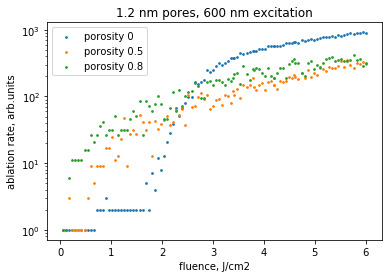

In [361]:
#for label in list(set(alldata.label)):
for label in ['1_2nmpores']:#,'2nmpores']:#,'1_8nmpores','2_5nmpores', '3nmpores']:
    for porosity in [0,0.5,0.8]:
        labeldata=alldata[alldata['label']==label][alldata['wavelength']==600][alldata['porosity']==porosity]
        plt.scatter(labeldata['fluence'],labeldata['flux']/(1-porosity)+1,label='porosity '+str(porosity),s=3)
plt.legend()
plt.xlabel('fluence, J/cm2')
plt.ylabel('ablation rate, arb.units')
#plt.xlim(0, 0.011)
#plt.ylim(0.1,500)
plt.yscale('log')
plt.title('1.2 nm pores, 600 nm excitation')

In [281]:
ablTH={}
for label in ['1_2nmpores', '2_5nmpores']:
#for label in list(set(alldata.label)):
    for porosity in [0,0.5,0.8]:
        labeldata=alldata[alldata['label']==label][alldata['wavelength']==600][alldata['porosity']==porosity]
        THdata=labeldata[labeldata['flux']>2][['fluence','flux']]
        ablTH[label,porosity]=np.array(THdata)[np.argmin(np.array(THdata)[:,1])][0]

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [282]:
ablTH

{('1_2nmpores', 0): 1.8599999999999999,
 ('1_2nmpores', 0.5): 1.32,
 ('1_2nmpores', 0.8): 0.48,
 ('2_5nmpores', 0): 1.92,
 ('2_5nmpores', 0.5): 1.8,
 ('2_5nmpores', 0.8): 0.8400000000000001}

Text(0.5, 0, 'porosity')

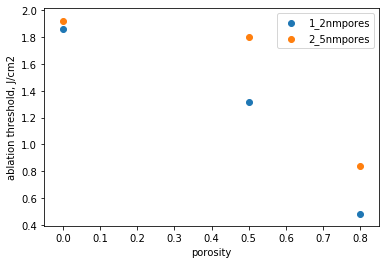

In [283]:
#allths=np.zeros((3,len(list(set(alldata.label)))))
allths=np.zeros((3,2))
#for i, label in enumerate(list(set(alldata.label))):
for i, label in enumerate(['1_2nmpores','2_5nmpores']):
    porosity=[0,0.5,0.8]
    plt.scatter(porosity, [ablTH[label,obj] for obj in porosity],label=label)
    for j, por in enumerate ([0,0.5,0.8]):
        allths[j,i]=ablTH[label,por] 
    #allths[1,i]=ablTH[label,0.5] 
    #allths[2,i]=ablTH[label,0.8] 
plt.legend()
#plt.ylim(-0.00,0.006)
plt.legend()
plt.ylabel('ablation threshold, J/cm2')
plt.xlabel('porosity')

In [279]:
allths

array([[1.8 , 1.92],
       [1.8 , 2.1 ],
       [1.2 , 1.8 ]])

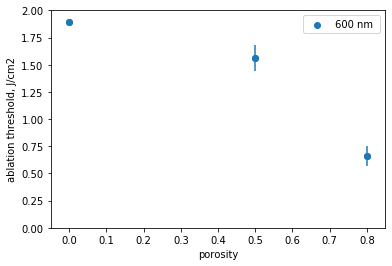

In [330]:
plt.scatter([0,0.5,0.8],allths.mean(axis=-1),label='600 nm ')
plt.errorbar([0,0.5,0.8],allths.mean(axis=-1),allths.std(axis=-1)/2,fmt='o')
plt.ylim(-0.001,2.0)
plt.legend()
plt.ylabel('ablation threshold, J/cm2')
plt.xlabel('porosity')
plt.legend()

In [59]:
np.array(ablTH)[:,1]

array([15, 12, 12, 12, 5, 13, 11, 6, 13, 23, 6, 18, 4, 14, 15, 9, 7, 9, 4,
       12, 8, 14, 12, 5, 5, 12, 5, 18, 4, 15, 8, 16, 22, 7, 24, 11, 5, 21,
       10, 4, 6, 14, 3, 22, 4, 15, 4, 3, 5, 7, 7, 15, 24, 18, 13, 22, 7,
       16, 7, 12, 22, 6, 12, 18, 24, 17, 9, 5, 13, 8, 20, 6, 8, 13, 15,
       18, 16, 4, 13, 4, 11, 16, 12, 6, 8, 9, 9, 16, 23, 17, 9, 17, 6, 24,
       10, 16, 17], dtype=object)

Text(0.5, 0, 'porosity')

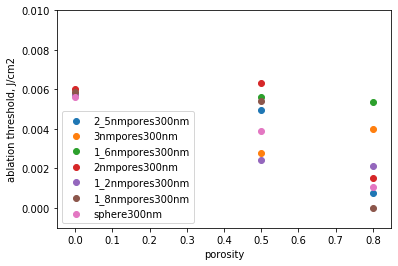

In [27]:
for kname in set(ablimits.name):
    #c={'2nmpores':"b",'sphere':'r','3nmpores':'g'}
    plt.scatter(ablimits[ablimits.name==kname][['porosity']],ablimits[ablimits.name==kname][['abl_limit']],label=kname + '300nm')
plt.ylim(-0.001,0.01)
plt.legend()
plt.ylabel('ablation threshold, J/cm2')
plt.xlabel('porosity')

(-0.001, 0.01)

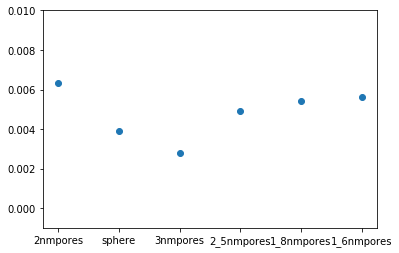

In [18]:
plt.scatter(ablimits[ablimits['porosity']==0.5]['name'], ablimits[ablimits['porosity']==0.5]['abl_limit'])
plt.ylim(-0.001,0.01)

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


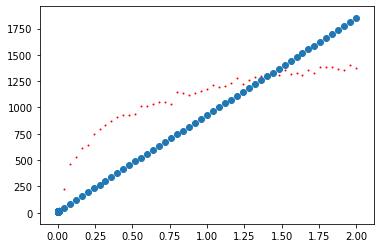

In [139]:
labeldata=alldata[alldata['label']==label][alldata['wavelength']==300][alldata['porosity']==porosity]
xsez1,ysez1= labeldata['fluence'],labeldata['flux']+1
(ablimit,slope,c), pcov = scipy.optimize.curve_fit(relu, xsez1,ysez1,bounds=(0, [0.01, 2000000., 10]))
plt.scatter(xsez1,ysez1,c='r',s=1)
plt.scatter(xsez1, relu(xsez1, ablimit, slope,c))

In [16]:
porous=np.stack([xsez1,ysez1]).T
nonporous=np.stack([xsez2,ysez2]).T

In [55]:
fig = plt.figure()
ax = Axes3D(fig) 
selected=Alldata[Alldata['porosity']==0.5][Alldata['fluence']==2]
ax.plot_trisurf(selected['pulselegth'],selected['wavelength'],selected['flux'].apply(lambda x: x*2))
selected=Alldata[Alldata['porosity']==0.0][Alldata['fluence']==2]
ax.plot_trisurf(selected['pulselegth'],selected['wavelength'],selected['flux'])#.apply(lambda x: np.log(x+1)))
'''selected=Alldata[Alldata['porosity']==0][Alldata['fluence']==2]
ax.plot_trisurf(selected['pulselegth'],selected['wavelength'],selected['flux'])
selected=Alldata[Alldata['porosity']==0][Alldata['fluence']==5]
ax.plot_trisurf(selected['pulselegth'],selected['wavelength'],selected['flux'])
selected=Alldata[Alldata['porosity']==0][Alldata['fluence']==10]
ax.plot_trisurf(selected['pulselegth'],selected['wavelength'],selected['flux'])
selected=Alldata[Alldata['porosity']==0][Alldata['fluence']==20]
ax.plot_trisurf(selected['pulselegth'],selected['wavelength'],selected['flux'])'''

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


"selected=Alldata[Alldata['porosity']==0][Alldata['fluence']==2]\nax.plot_trisurf(selected['pulselegth'],selected['wavelength'],selected['flux'])\nselected=Alldata[Alldata['porosity']==0][Alldata['fluence']==5]\nax.plot_trisurf(selected['pulselegth'],selected['wavelength'],selected['flux'])\nselected=Alldata[Alldata['porosity']==0][Alldata['fluence']==10]\nax.plot_trisurf(selected['pulselegth'],selected['wavelength'],selected['flux'])\nselected=Alldata[Alldata['porosity']==0][Alldata['fluence']==20]\nax.plot_trisurf(selected['pulselegth'],selected['wavelength'],selected['flux'])"

In [63]:
allsamples['NPs_flux_output1000nm1Jcm240fs0.5por10nmsize'].iloc[200]

5.0

In [25]:
allsamples.to_csv('allsamples.csv')